<a href="https://colab.research.google.com/github/priyanjanjb/Cat-or-Dog-Image-Classifier/blob/Classifier/CatOrDog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
!pip install tensorflow -q
!pip install numpy -q
!pip install matplotlib -q
!pip install pandas -q

!pip install opendatasets -q



In [40]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time #calculate time

import opendatasets as od

In [41]:
od.download('https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification') #download dataset

Skipping, found downloaded files in "./cats-and-dogs-for-classification" (use force=True to force download)


In [42]:
BATCH_SIZE = 64
IMAGE_SIZE = (128,128) #height and width

In [43]:
train_data_dir = "/content/cats-and-dogs-for-classification/cats_dogs/train"
test_data_dir = "/content/cats-and-dogs-for-classification/cats_dogs/test"

In [44]:
train_data = tf.keras.utils.image_dataset_from_directory (train_data_dir,
                                                         batch_size =BATCH_SIZE,
                                                         image_size = IMAGE_SIZE,
                                                         subset = "training",
                                                         validation_split = 0.1,
                                                         seed = 42)

validation_data = tf.keras.utils.image_dataset_from_directory (train_data_dir,
                                                         batch_size =BATCH_SIZE,
                                                         image_size = IMAGE_SIZE,
                                                         subset = "validation",
                                                         validation_split = 0.1,
                                                         seed = 42)
test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                         batch_size =BATCH_SIZE,
                                                         image_size = IMAGE_SIZE,
                                                         )

Found 8000 files belonging to 2 classes.
Using 7200 files for training.
Found 8000 files belonging to 2 classes.
Using 800 files for validation.
Found 2000 files belonging to 2 classes.


In [45]:
class_names = train_data.class_names
class_names

['cats', 'dogs']

In [46]:
for image_batch, label_batch in train_data.take(1):
  print(image_batch.shape) #(32, 128, 128, 3) batch size 32 imge size 128 128 color chanal 3
  print (label_batch.shape)

(64, 128, 128, 3)
(64,)


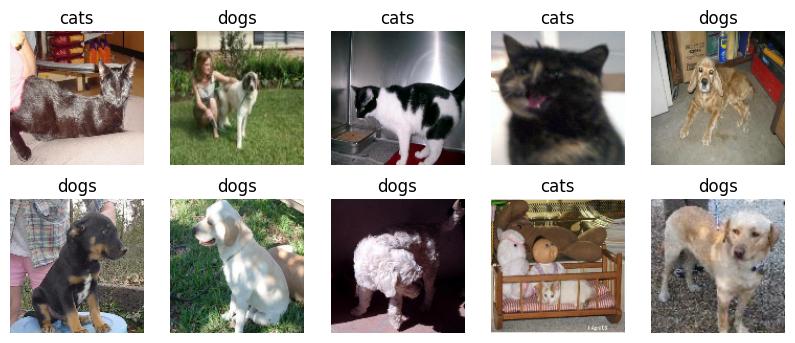

In [47]:
#plot data sample
plt.figure(figsize=(10,4))
for image,label  in train_data.take(1):
  for i in range(10):
    ax = plt.subplot(2,5,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(class_names[label[i]])
    plt.axis("off")

In [85]:
#data preprocessing
#feature scaling
#for image,label  in train_data.take(1):
 # for i in range(10):
   # print (image)

In [49]:
train_data = train_data.map(lambda x,y:(x/255.0,y))
validation_data = validation_data.map(lambda x,y:(x/255.0,y))
test_data = test_data.map(lambda x,y:(x/255.0,y))
#feature scaling


In [50]:
for image,label  in train_data.take(1):
  for i in range(2):
    print (image)

tf.Tensor(
[[[[0.00176164 0.00744485 0.00352328]
   [0.01568628 0.01295956 0.01432292]
   [0.02642463 0.         0.00880821]
   ...
   [0.21272978 0.16367954 0.0960478 ]
   [0.27945772 0.1698223  0.11355699]
   [0.2684283  0.16686581 0.09371936]]

  [[0.00784314 0.00784314 0.00784314]
   [0.02761948 0.01704963 0.0209712 ]
   [0.04313726 0.02552083 0.03040748]
   ...
   [0.19800858 0.1470282  0.08036152]
   [0.27144608 0.16845895 0.11083027]
   [0.27058825 0.16470589 0.09803922]]

  [[0.01960784 0.00824142 0.01216299]
   [0.01176471 0.         0.        ]
   [0.03336397 0.0176777  0.02159926]
   ...
   [0.2725184  0.21266851 0.14895834]
   [0.24689032 0.16726409 0.10059743]
   [0.24137561 0.13509497 0.07843138]]

  ...

  [[0.5143536  0.39278492 0.28082108]
   [0.52924323 0.3998315  0.27826285]
   [0.49707416 0.35589767 0.22847733]
   ...
   [0.43710172 0.32337624 0.20572917]
   [0.45183823 0.3159467  0.20614277]
   [0.45314032 0.319807   0.22176777]]

  [[0.56447613 0.4842831  0.378400

In [51]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal",input_shape=(128,128,3)),
        tf.keras.layers.RandomRotation(0.2),
        tf.keras.layers.RandomZoom(0.2),
    ]
)

In [52]:
model = tf.keras.models.Sequential()

model.add(data_augmentation)

model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
#added new
model.add(tf.keras.layers.Conv2D(256, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


In [53]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 128)      

In [54]:

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [55]:
start_time = time.time()

history = model.fit(train_data,
                    epochs=30,
                    validation_data=validation_data)

end_time = time.time()

Epoch 1/30
113/113 [==============================] - 350s 3s/step - loss: 0.6838 - accuracy: 0.5863 - val_loss: 0.7856 - val_accuracy: 0.5063
Epoch 2/30
113/113 [==============================] - 317s 3s/step - loss: 0.6455 - accuracy: 0.6296 - val_loss: 0.6517 - val_accuracy: 0.5850
Epoch 3/30
113/113 [==============================] - 327s 3s/step - loss: 0.6154 - accuracy: 0.6639 - val_loss: 0.5711 - val_accuracy: 0.7175
Epoch 4/30
113/113 [==============================] - 311s 3s/step - loss: 0.5990 - accuracy: 0.6772 - val_loss: 0.5468 - val_accuracy: 0.7387
Epoch 5/30
113/113 [==============================] - 328s 3s/step - loss: 0.5869 - accuracy: 0.6917 - val_loss: 0.6501 - val_accuracy: 0.5987
Epoch 6/30
113/113 [==============================] - 312s 3s/step - loss: 0.5678 - accuracy: 0.7040 - val_loss: 0.6201 - val_accuracy: 0.6662
Epoch 7/30
113/113 [==============================] - 317s 3s/step - loss: 0.5481 - accuracy: 0.7174 - val_loss: 0.4705 - val_accuracy: 0.7875

In [56]:
print(f'Total time for training {((end_time-start_time)/3600):.2f} hours')

Total time for training 2.76 hours


# **Preformans**


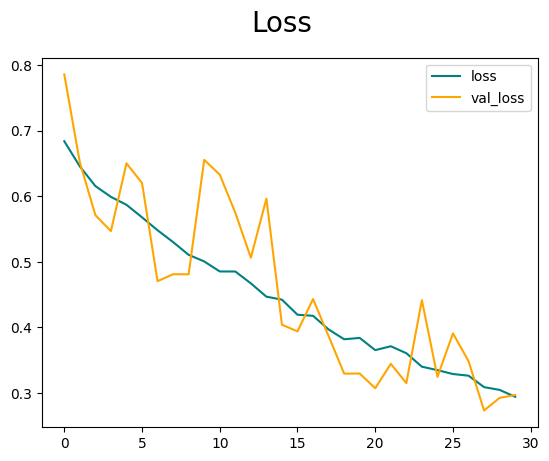

In [57]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend()
plt.show()

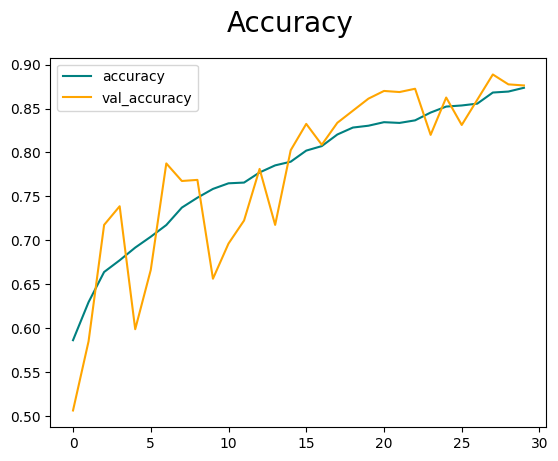

In [58]:

fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend()
plt.show()



**modele evaluation**



In [59]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()


In [60]:
for batch in test_data.as_numpy_iterator(): #test data set
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 [==============================] - 0s 425ms/step


In [61]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.83776355>

In [62]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.914>

In [63]:
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.8685>

**TEST**

In [64]:
!pip install opencv-python -q

In [65]:
import cv2

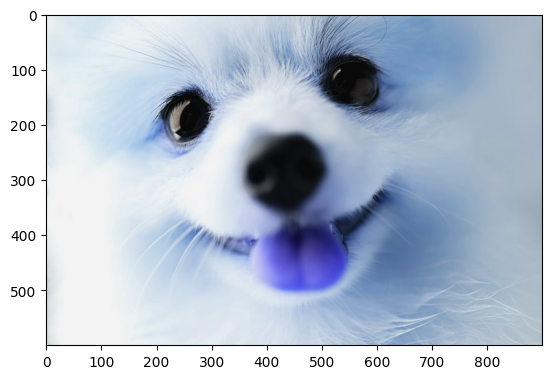

In [87]:
img = cv2.imread('/content/small+white+fluffy+dog+smiling+at+the+camera+in+close-up-min.jpg')
plt.imshow(img)
plt.show()

In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:

resized_image = tf.image.resize(img, IMAGE_SIZE)
scaled_image = resized_image/255


In [78]:
scaled_image.shape

TensorShape([128, 128, 3])

In [79]:
np.expand_dims(scaled_image, 0).shape

(1, 128, 128, 3)

In [80]:
y_hat  = model.predict(np.expand_dims(scaled_image, 0))

1/1 [==============================] - 0s 39ms/step


In [81]:
y_hat

array([[0.5076728]], dtype=float32)

In [82]:
class_names # y_hat<0.5 cats  y_hat>0.5

['cats', 'dogs']

In [86]:
if y_hat > 0.5:
    print(f'{class_names[1]}')
else:
    print(f'{class_names[0]}')


dogs
